# Project Customer Data Analysis 

### Group: 29

### Name: Wafa Mohamed
### Student number: 2097778

## Used packages

In [278]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

from surprise import Dataset, Reader
from surprise import Reader
from surprise import NormalPredictor, KNNWithMeans,SVD
from surprise.model_selection import cross_validate, KFold, GridSearchCV,train_test_split
import pickle

from datetime import datetime
from surprise import accuracy, Dataset, SVD

seed_value= 0
np.random.seed(seed_value)
import warnings
warnings.filterwarnings("ignore")

# **$\color{green}{\text{Part 1: Exploratory Data Analysis}}$**

- `Total number of obsevations`: This dataset contains 27,753,444 observations/ratings based on 53,889 movies and 283,228 users.
- `Missing values`: There are no missing values.
- `Sparsity`: This dataset is 99.82% sparse. 

In [279]:
# load the dataset
df = pd.read_csv("MovieLens-Ratings.csv", na_values=-1)
df.head(2)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456


In [280]:
# description of ratings
df["rating"].describe().round(2)

count    27753444.00
mean            3.53
std             1.07
min             0.50
25%             3.00
50%             3.50
75%             4.00
max             5.00
Name: rating, dtype: float64

In [281]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [282]:
# Number of observations, users, and movies 
print('Number of observations: %d\nNumber of columns:%d\nNumber of movies: %d\nNumber of users: %d' % (df.shape[0],
                                                                           len(df.columns),                           
                                                                           len(df['movieId'].unique()),
                                                                           len(df['userId'].unique())))

Number of observations: 27753444
Number of columns:4
Number of movies: 53889
Number of users: 283228


In [283]:
# Sparsity user-movie interaction
rating_count =  df[("rating")].count()
users_count = df[("userId")].nunique()
movies_count = df[("movieId")].nunique()
sparsity_df = 1 - (rating_count / ((users_count)*(movies_count)))

print("The sparsity of this dataset is:",round(sparsity_df*100, 2),"%" )

The sparsity of this dataset is: 99.82 %


## $\color{red}{\text{ Analysis Of The Rating Score}}$

- `Movie ratings and ratings given by a user`: The average number of ratings per movie is 3.07 and the average number of ratings given by one user is 3.64.
- `Mean and standard deviation`: The mean average of the ratings is 3.55, with a standard deviation of 1.07, suggesting some variability in the ratings.
- `Rating Distribution`: Most of the ratings fall between 3 and 5, meaning many users were satisfied. The most common rating score is 4, while the least common rating score is 1.5.
- `Dot Density Map`: The Dot Density Map indicates that most ratings when grouped by movies are concentrated between 2.5 and 4. For the users, the distribution is wider(spanning from 2 to 5).
- `Skewness and kurtosis`: The rating distribution is negative/right skewed, with skewness of -0.7 (The is can also be seen from the histogram). This indicates that the ratings are skewed towards higher values, with fewer lower ratings. The kurtosis of the ratings is relatively low at 0.2, suggesting that the distribution of the ratings is relatively more spread out and less concentrated around the mean compared to a normal distribution (fewer outliers). 

- `Outliers`: From the boxplot it is clear that there are outliers, specifically below the minimum whisker. These outliers likely represent movies with particularly low ratings.

- `Outliers vs. Non-Outliers`: The dataset has been split into two subsets based on the rating score's Interquartile Range (IQR). The outlier dataset contains 1,328,721 observations, 153,787 unique users, and 27,724 unique movie IDs. The Non-outliers dataset contains 26,424,823 observations, 282,652 unique users, and 52,769 unique movies

In [284]:
print("The average number of ratings per movie is: ", round(np.mean(df.groupby(['movieId'])["rating"].mean()), 2))
print("The average number of ratings per user is: ", round(np.mean(df.groupby(['userId'])["rating"].mean()), 2))

The average number of ratings per movie is:  3.07
The average number of ratings per user is:  3.64


In [285]:
# simple statistical scores based on the rating feature
print("The mean average of rating is: {}".format(round(df["rating"].mean(),2)))
print("The lowest movie rating score is : {}".format(round(df["rating"].min(), 2)))
print("The highest movie rating score is: {}".format(round(df["rating"].max(), 2)))
print("The standard deviation of the ratings score is : {}".format(round(df["rating"].std(),2)))
print("The Median score of the rating score is : {}".format(round(df["rating"].median(),2)))
print("The mode score of the rating score is : {}".format(round(df["rating"].mode(),2)))

The mean average of rating is: 3.53
The lowest movie rating score is : 0.5
The highest movie rating score is: 5.0
The standard deviation of the ratings score is : 1.07
The Median score of the rating score is : 3.5
The mode score of the rating score is : 0    4.0
Name: rating, dtype: float64


In [286]:
print("The skewness of rating feature: {}".format(round(skew(df['rating']), 2)))
print("The kurtosis of rating feature: {}".format(round(kurtosis(df['rating']), 2)))

The skewness of rating feature: -0.7
The kurtosis of rating feature: 0.2


Text(0.5, 1.0, 'Ratings distribution')

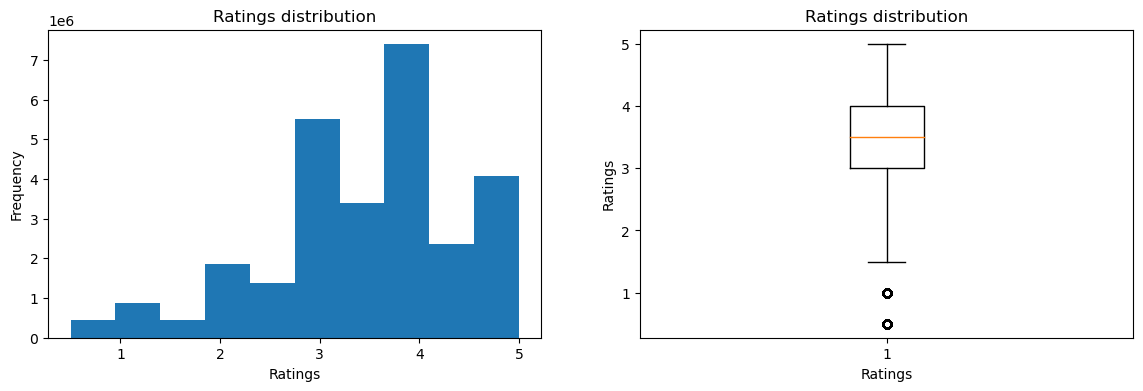

In [287]:
# histogram and boxplot of the rating score
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.hist(df["rating"])
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings distribution")

plt.subplot(122)
plt.boxplot(df["rating"])
plt.xlabel("Ratings")
plt.ylabel("Ratings")
plt.title("Ratings distribution")

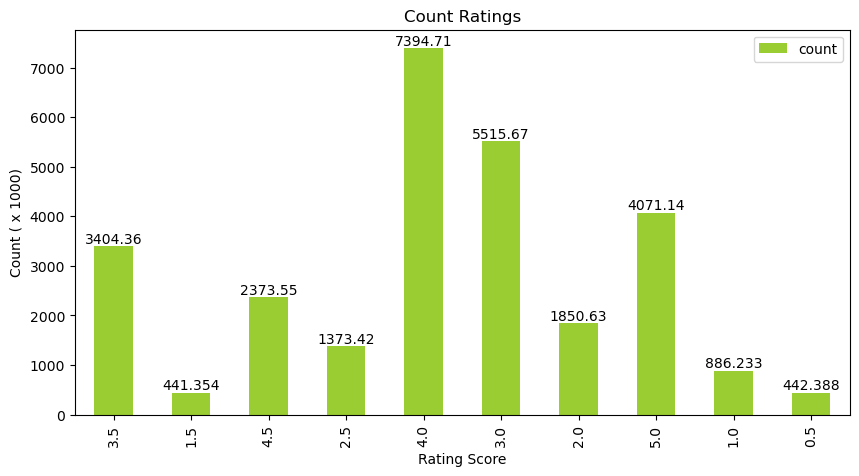

In [288]:
# The distribution of the rating score (divide by 1000 for the readability)
count_rating = pd.DataFrame(df['rating'].value_counts(sort=False)/ 1000)
plt.rcParams["figure.figsize"] = (10,5)
ax =count_rating.plot(kind= "bar", title = "Count Ratings", xlabel = "Rating Score", ylabel = "Count ( x 1000)", color = "yellowgreen")

# This is adopted from: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots 
for container in ax.containers:
    ax.bar_label(container)

,movieId,total_ratings,average_rating
0,1,68469,3.886649
1,2,27143,3.246583
2,3,15585,3.173981
3,4,2989,2.874540
4,5,15474,3.077291
...,...,...,...
53884,193876,1,3.000000
53885,193878,1,2.000000
53886,193880,1,2.000000
53887,193882,1,2.000000


Text(0.5, 1.0, 'Number Of Movies Per Average Rating Score')

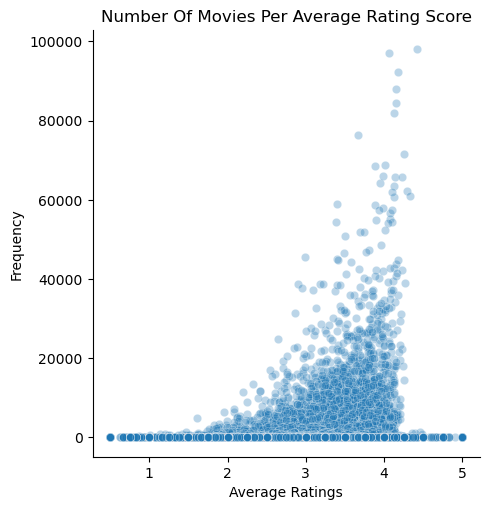

In [289]:
# Movies dataset
# Calculate the number of ratings each movie has received
movie_ratings_count= pd.DataFrame(df.groupby(["movieId"])["userId"].count())
movie_ratings_count.columns = ['total_ratings']
movie_ratings_count.reset_index(inplace = True)

# Calculate the average rating received each movie
movie_average_ratings = pd.DataFrame(df.groupby(["movieId"])["rating"].mean())
movie_average_ratings.columns = ["average_rating"]
movie_average_ratings.reset_index(inplace = True)

# Merge the two datasets
movie_data = movie_ratings_count.merge(movie_average_ratings,on='movieId')
display(movie_data)

# Display the Dot Density Map of the movie_dataset
sns.relplot(x="average_rating", y="total_ratings", kind = 'scatter', data=movie_data, sizes=(30, 200), alpha=0.3,)
plt.xlabel("Average Ratings")
plt.ylabel("Frequency")
plt.title("Number Of Movies Per Average Rating Score")

,userId,total_ratings,average_rating
0,1,16,3.312500
1,2,15,3.666667
2,3,11,3.545455
3,4,736,3.397418
4,5,72,4.263889
...,...,...,...
283223,283224,329,3.732523
283224,283225,20,3.100000
283225,283226,11,1.818182
283226,283227,17,3.941176


1

Text(-12.805555555555555, 0.5, 'Frequency')

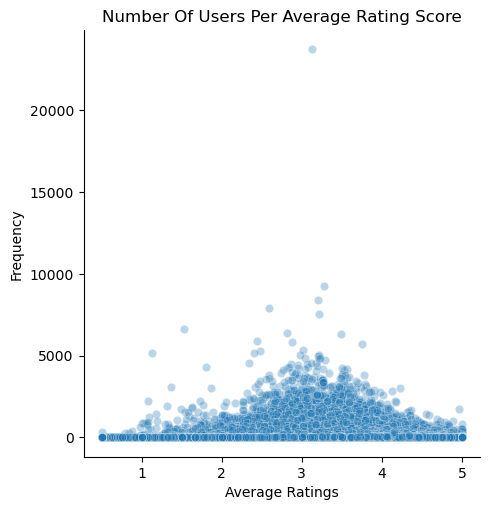

In [290]:
# users dataset
# Calculate the number of ratings given by each user
user_ratings_count = pd.DataFrame(df.groupby(["userId"])["movieId"].count())
user_ratings_count.columns = ['total_ratings']
user_ratings_count.reset_index(inplace = True)

# Calculate the average rating given by each user
user_average_ratings = pd.DataFrame(df.groupby(["userId"])["rating"].mean())
user_average_ratings.columns = ["average_rating"]
user_average_ratings.reset_index(inplace = True)

# merge the two datasets
user_data = user_ratings_count.merge(user_average_ratings,on='userId')
display(user_data, 1)

# Plot Dot Density Map
sns.relplot(x="average_rating", y="total_ratings", kind = 'scatter', data=user_data, sizes=(30, 200), alpha=0.3,)
plt.title("Number Of Users Per Average Rating Score")
plt.xlabel("Average Ratings")
plt.ylabel("Frequency")

In [291]:
# calculate the dataset with outliers and the dataset without outliers based on IQR 
def data_with_without_outliers (df): 
    q1 = df['rating'].quantile(0.25)
    q3 = df['rating'].quantile(0.75)
    iqr = q3 - q1
    
    # Upper and lower bound
    lower_b = q1 - 1.5 * iqr
    upper_b = q3  + 1.5 * iqr
    
    # data without outliers
    df_outliers = df[(df['rating'] < lower_b) | (df['rating'] > upper_b)]
    df_exclude_outliers = df[~((df['rating'] < lower_b) | (df['rating'] > upper_b))]
    
    return df_exclude_outliers, df_outliers 

df_without_outliers,df_outliers = data_with_without_outliers(df)

print('Number of outliers based on the lower and the upper bound of the rating score: {}'.
      format((len(df) - len(df_without_outliers))))
print('Percentage of outlier based on the lower and the upper bound of the rating score: {} %'.
      format(round(((len(df)- len(df_without_outliers)) / len(df) * 100),2)))


Number of outliers based on the lower and the upper bound of the rating score: 1328621
Percentage of outlier based on the lower and the upper bound of the rating score: 4.79 %


In [292]:
# Display the dataset with outliers
display(df_outliers)
print("Number of unique users on the outliers dataset: {}".format(df_outliers["userId"].nunique()))
print("Number of unique movies on the outliers dataset: {}".format(df_outliers["movieId"].nunique()))

print()

# Display the dataset without outliers
display(df_without_outliers)
print("Number of unique users on the dataset without outliers: {}".format(df_without_outliers["userId"].nunique()))
print("Number of unique movies on the datset without outliers: {}".format(df_without_outliers["movieId"].nunique()))


,userId,movieId,rating,timestamp
59,4,44,1.0,1123989796
65,4,65,0.5,1115782387
66,4,66,0.5,1145937915
79,4,158,0.5,1127946524
84,4,169,0.5,1113796675
...,...,...,...,...
27753277,283224,1389,1.0,851002144
27753303,283226,65,1.0,1001619967
27753307,283226,420,1.0,1001619953
27753308,283226,502,1.0,1001620011


Number of unique users on the outliers dataset: 153787
Number of unique movies on the outliers dataset: 27724



,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


Number of unique users on the dataset without outliers: 282652
Number of unique movies on the datset without outliers: 52769





## $\color {red} {\text{Users And Movies Analysis}}$


- `Cumulative Distribution Function (ECDF)`: This graph indicates that both the number of users and movies are right-skewed in their distribution. 75% of the movies have a log-normalized rating count of approximately 4, which is significantly lower than the average number of movies rated (515). This implies that there are many less-popular movies with relatively few user ratings and a smaller number of movies with a significant number of user ratings. For the users, 75% of them have a log-normalized rating count of around 4.5, and the average number of users who have rated a movie is 98. This indicates a relatively high level of active users, but there is a wider distribution compared to the movie ratings.
- `Segmentation`: Based on the ECDF graph both the movies and users have been segmented into three different categories (see the code for the used threshold): highly rated movies[3736] /highly rating users[2213], moderately rated moves [9174] /moderately rating users [100914], and lowly rated movies[40979] /lowly rating users [180101]. This categorization shows that the majority of the movies belong to the segment of lowly rated movies (76%).
- `Top 20 users`: There are some very active users in this dataset, with one user having rated a significant number of movies (23715). A boxplot analysis of the top 20 users reveals that many of them have outliers in their ratings. For the top 20 users, only six do not have any outliers in their ratings.
- `Top 20 movies`: For the top 20 movies, all of them have outliers that fall below the minimum whisker.
- `Average rated movies vs. Average number of ratings per user`: A large portion of users (13,865) have rated fewer than 98 movies. Similarly, a significant number of movies (48,415) have received fewer than 515 ratings, which is circa 90% of the total movies.

In [293]:
# Calculate the number of ratings per user and per movie
user_counts = df['userId'].value_counts(sort=True, ascending=False)
movie_counts = df['movieId'].value_counts(sort=True, ascending=False)

# Show statistics for users
print("Number of ratings for top rating user:", user_counts.max())
print("Number of ratings for least rating user:", user_counts.min())
print("Average per ratings per user:", round(user_counts.mean()))

print()

# Show statistics for movies
print("Number of ratings for top rated movie:", movie_counts.max())
print("Number of ratings for least rated movie:", movie_counts.min())
print("Average per ratings per movie:", round(movie_counts.mean()))


Number of ratings for top rating user: 23715
Number of ratings for least rating user: 1
Average per ratings per user: 98

Number of ratings for top rated movie: 97999
Number of ratings for least rated movie: 1
Average per ratings per movie: 515


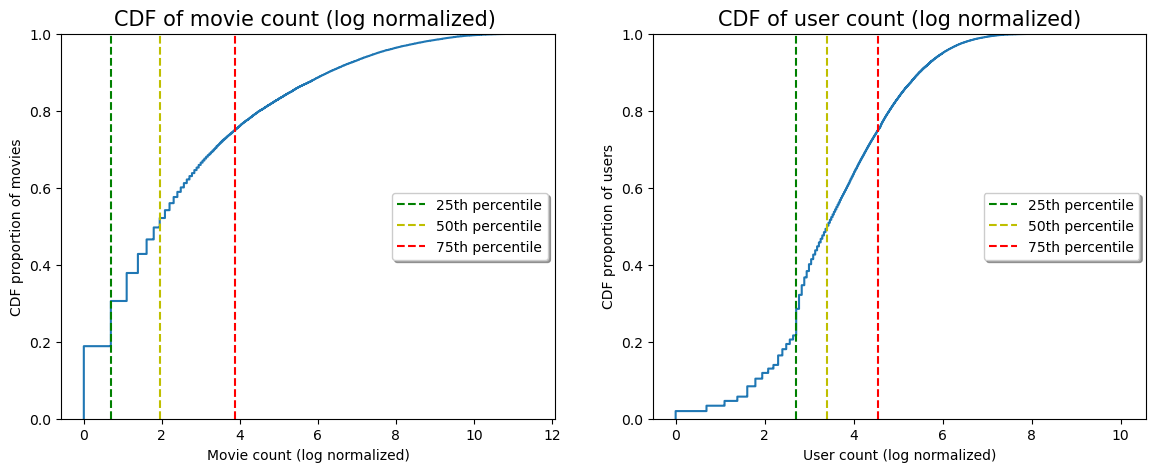

In [294]:
# Cumulative Distribution Function (movies and users).
# The number of movies and users are log normalized for readability

# The percentiles
per_users = np.percentile(np.log(user_counts), [25, 50, 75])
per_movies = np.percentile(np.log(movie_counts), [25, 50, 75])


# Plot the CDF of log-normalized movie counts
plt.figure(figsize = (14,5))
plt.subplot(121)
sns.ecdfplot(x = np.log(movie_counts))
plt.title("CDF of movie count (log normalized) ", fontsize=15)
plt.xlabel("Movie count (log normalized)")
plt.ylabel("CDF proportion of movies")
plt.axvline(per_movies[0], linestyle='--', color='g', label = '25th percentile')
plt.axvline(per_movies[1], linestyle='--', color='y', label = '50th percentile')
plt.axvline(per_movies[2], linestyle='--', color='r', label = '75th percentile')
plt.legend(loc='center right', shadow=True)


# Plot the CDF of log-normalized user counts
plt.subplot(122)
sns.ecdfplot(x = np.log(user_counts))
plt.title("CDF of user count (log normalized)", fontsize=15)
plt.xlabel("User count (log normalized)")
plt.ylabel("CDF proportion of users")
plt.axvline(per_users[0], linestyle='--', color='g', label ='25th percentile')
plt.axvline(per_users[1], linestyle='--', color='y', label = '50th percentile')
plt.axvline(per_users[2], linestyle='--', color='r', label = '75th percentile')
plt.legend(loc='center right', shadow=True)


In [295]:
# This code was constructed to group the movies based on the log-normalized value of how many times they have been rated

df_movie_count = pd.DataFrame(movie_counts)
df_movie_count.columns = ["movie_count"]
df_movie_count["log_normalized_ratings"] = np.log(df_movie_count["movie_count"])
df_movie_count
 
# How to write a condition function based on multiple conditions was adapted from: https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions

def conditions(x):
    
    # movies with log-normalized >= 7 are considered top highly popular movies
    if   x >= 7:   return "highly_rated_movies"
    
    # between 7 and 4 are moderately moves
    elif x >= 4:   return "moderately_rated_movies"
    
    # lower than 4 it means less popular movies
    else:           return "lowly_rated_movies"

func         = np.vectorize(conditions)
movie_class = func(df_movie_count["log_normalized_ratings"])

df_movie_count["movie_class"] = movie_class

df_movie_count.groupby(["movie_class"]).size()

movie_class
highly_rated_movies         3736
lowly_rated_movies         40979
moderately_rated_movies     9174
dtype: int64

In [296]:
# This code is constructed to group the number of users based on the log-normalized value of number of times a user has rated a movie

df_user_count = pd.DataFrame(user_counts)
df_user_count.columns = ["count_users"]
df_user_count["log_normalized_ratings"] = np.log(df_user_count["count_users"])

 
# how to write a condition function based on multiple conditions was adapted from: https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions

def conditions(x):
    # users with log-normalized >= 7 are considered top highly rating users
    if   x >= 7:   return "highly_rating_users"
    
  # between 7 and 4 are moderately rating users
    elif x >= 4:   return "moderately_rating users"
    
    # lower than 4 it means less rating users
    else:           return "lowly_rating users"

func         = np.vectorize(conditions)
user_class = func(df_user_count["log_normalized_ratings"])

df_user_count["user_class"] = user_class

df_user_count.groupby(["user_class"]).size()

user_class
highly_rating_users          2213
lowly_rating users         180101
moderately_rating users    100914
dtype: int64

## $\color{red}{\text{Top 20 Users And Movies}}$

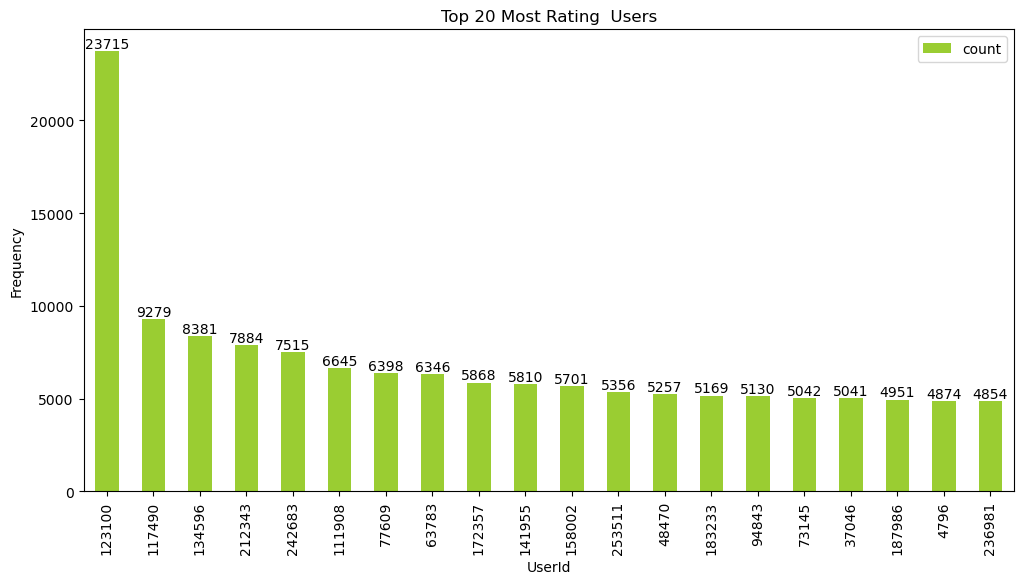

In [297]:
# plot Top 20 users and visualize
plt.rcParams["figure.figsize"] = (12,6)
ax = pd.DataFrame(user_counts).nlargest(20, columns="count").plot(kind = "bar", title = "Top 20 Most Rating  Users",                                                    
                                                xlabel = "UserId", ylabel = "Frequency", color = 'yellowgreen')

# This is adopted from: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots 
for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='userId', ylabel='rating'>

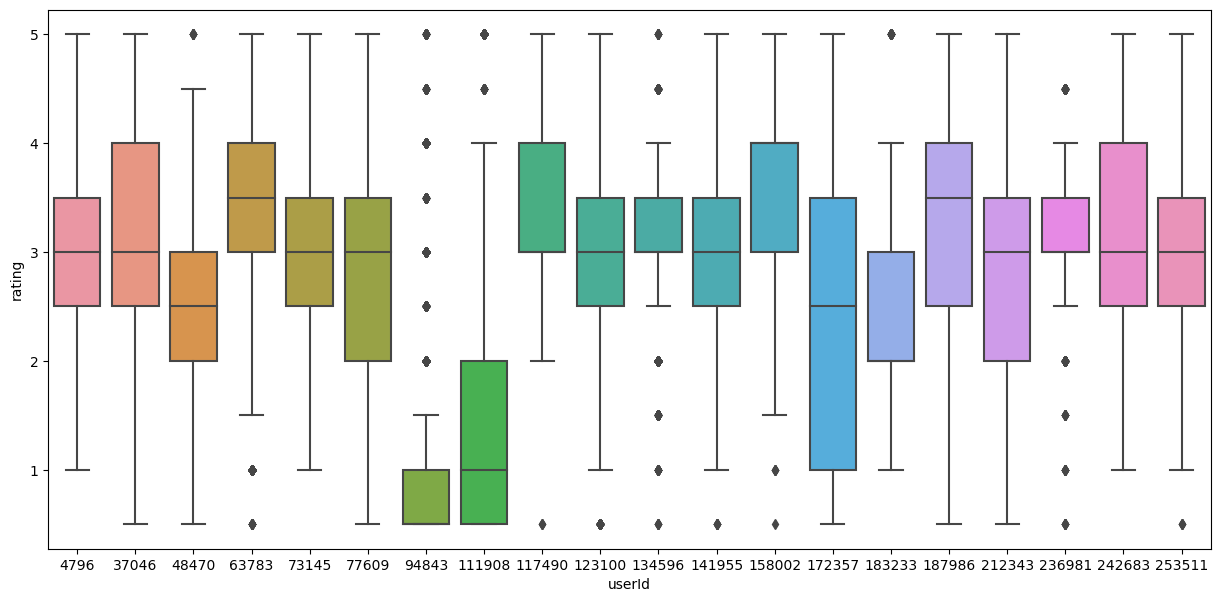

In [298]:
# Create a boxplot for top 20 users
top_20 = pd.DataFrame(user_counts).nlargest(20, columns="count")
top_20_df_users = df[df["userId"].isin(top_20.index)]

plt.figure(figsize = (15,7))
sns.boxplot(data=top_20_df_users, x='userId', y='rating')

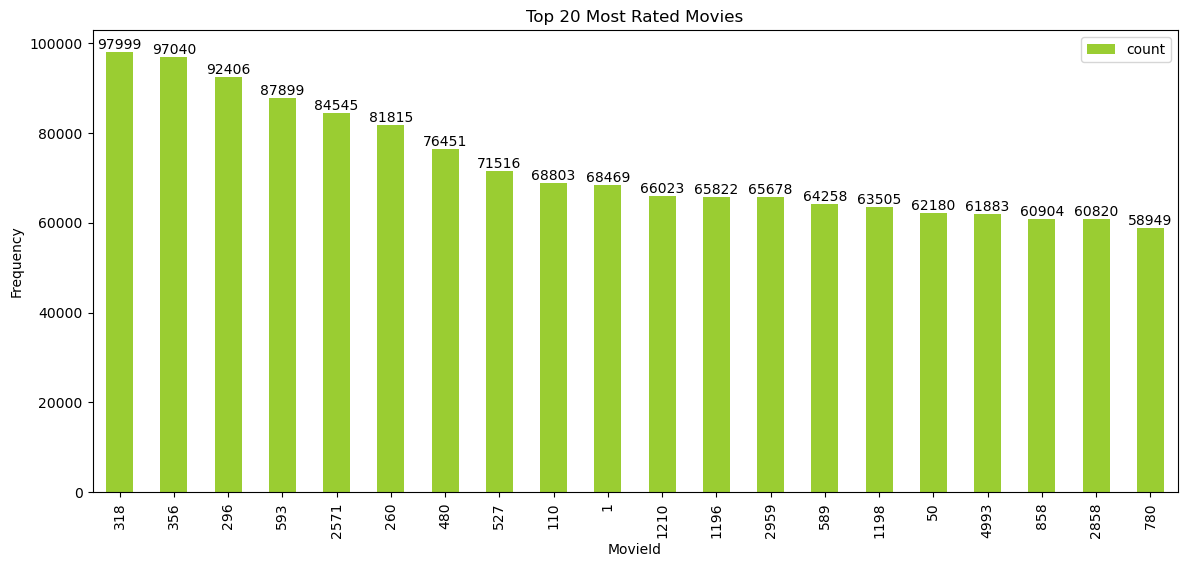

In [299]:

# Extract Top 20 movies and visualize
plt.rcParams["figure.figsize"] = (14,6)
ax = pd.DataFrame(movie_counts).nlargest(20, columns="count").plot(kind = "bar", title = "Top 20 Most Rated Movies", 
                                                               xlabel = 'MovieId', ylabel = "Frequency", color = "yellowgreen")

# This is adopted from: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots 
for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='movieId', ylabel='rating'>

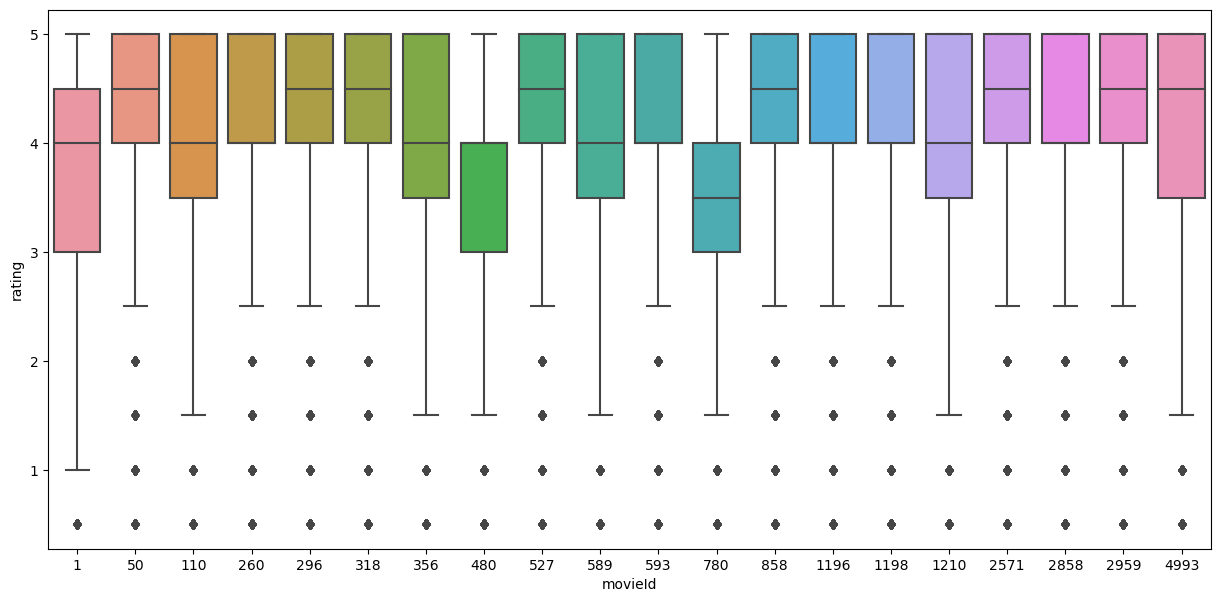

In [300]:
# Create a boxplot for top 20 movies
top_20 = pd.DataFrame(movie_counts).nlargest(20, columns="count")
top_20_df_movies = df[df["movieId"].isin(top_20.index)]

plt.figure(figsize = (15,7))
sns.boxplot(data = top_20_df_movies, x= "movieId", y= "rating")

In [301]:
# number of movies or users below the average 
user_threshold = 98
movie_threshold = 515
a = pd.DataFrame(user_counts < user_threshold) # convert to dataframe
a.reset_index(inplace = True)
b = pd.DataFrame(movie_counts < movie_threshold) # convert to dataframe
b.reset_index(inplace = True)

print("{} of the users have rated less than {} movie. ".format(len(a[a["count"] ==True]), user_threshold))

print("{} of the movies have received less than {} rates. ".format(len(b[b["count"] ==True]), movie_threshold))

213865 of the users have rated less than 98 movie. 
48415 of the movies have received less than 515 rates. 


## $\color{red}{\text{Timestamp Feature}}$

`Saturday` and `Sunday` have the highest frequency based on the number of movies watched/rated each day of the week. This might be because most people have weekends more leisure time to watch a movie. `Friday` is the day with the least movie counts, but `Tuesday` had for all days the lowest rating score. We opted to exclude the timestamp feature from our model training due to the data being confined to a short timeframe within the same month.


In [302]:
df = pd.read_csv("MovieLens-Ratings.csv", na_values=-1)

# Convert the timestamp to date
df['timestamp'] = pd.to_datetime(df['timestamp'] / 1000, unit='s')
display(df)
print("The earliest date was {}".format(df["timestamp"].min()))
print("The latest date was {}".format(df["timestamp"].max()))

,userId,movieId,rating,timestamp
0,1,307,3.5,1970-01-15 13:04:37.221
1,1,481,3.5,1970-01-15 13:04:37.456
2,1,1091,1.5,1970-01-15 13:04:37.471
3,1,1257,4.5,1970-01-15 13:04:37.460
4,1,1449,4.5,1970-01-15 13:04:37.264
...,...,...,...,...
27753439,283228,8542,4.5,1970-01-16 23:18:02.795
27753440,283228,8712,4.5,1970-01-16 23:18:02.751
27753441,283228,34405,4.5,1970-01-16 23:18:02.889
27753442,283228,44761,4.5,1970-01-16 16:09:19.524


The earliest date was 1970-01-10 03:20:52.004000
The latest date was 1970-01-18 19:12:25.149000


Text(0.5, 1.0, 'Number Of Users Per Day Of The Week')

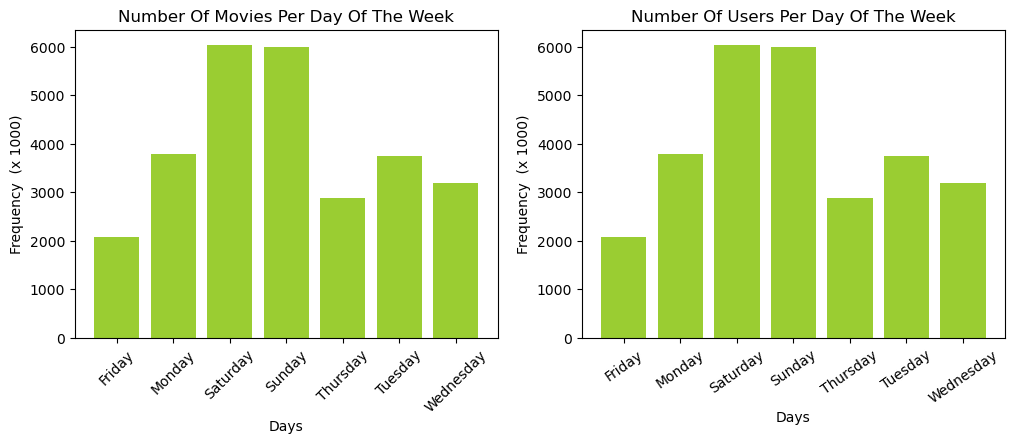

In [303]:
# Extract days of the week and calculate the number of movies and users
days = df["timestamp"].dt.day_name()
movie_days = pd.DataFrame(df["movieId"].groupby(days).count())
user_days = pd.DataFrame(df["userId"].groupby(days).count())

# plot number of movies each day
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.bar(movie_days.index, movie_days["movieId"]/1000, color = "yellowgreen")
plt.xlabel("Days")
plt.ylabel("Frequency  (x 1000)")
plt.xticks(rotation=45)
plt.title("Number Of Movies Per Day Of The Week")

# plot number of each week
plt.subplot(122)
plt.bar(user_days.index, user_days["userId"]/1000, color = "yellowgreen")
plt.xlabel("Days")
plt.ylabel("Frequency  (x 1000)")
plt.xticks(rotation=35)
plt.title("Number Of Users Per Day Of The Week")

Text(0.5, 1.0, 'Average Ratings Per Day Of The Week')

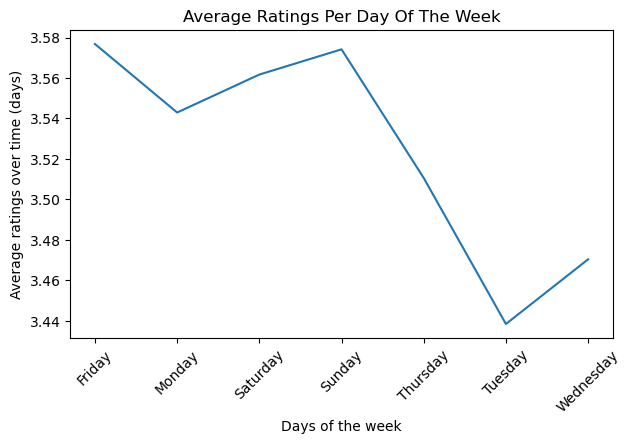

In [304]:
# average ratings score per day
days = df["timestamp"].dt.day_name()
groupby_day = df["rating"].groupby(days).mean()

# plot average ratings
plt.figure(figsize = (7,4))
plt.plot(groupby_day)
plt.xlabel("Days of the week")
plt.ylabel("Average ratings over time (days)")
plt.xticks(rotation=45)
plt.title("Average Ratings Per Day Of The Week")

## $\color{red} {\text{Dimensionality Reduction}}$

Based on the insights gained from the EDA analysis of this dataset, we have identified various subsets that can be used to train a recommendation model. For instance, one can choose to focus on lowly rated movies, highly rated movies, or user/movie-centric analysis. For this assignment, we have chosen to focus on movies that received ratings higher than the average ratings per movie. This subset selection helps us reduce the dimensionality of the dataset. 

After applying this threshold, the new dataset consists of 23,418,810 observations, which accounts for approximately 84% of the original dataset. However, even with this reduction, the datasets remain quite large. Attempting to train SVD and KNN-based models (using GridSearch) in our Jupyter notebook led to memory issues. 

To address this challenge, we randomly selected 30% of the observations of the new dataset to train Gridsearch. This represents roughly 25% of the original dataset, allowing us to work with a more manageable dataset size. Subsequently, the best-found parameters were used to train all the filtered observations.To do this,  we split into train and test sets using a ratio of 0.4 for the test data. This ratio was chosen, because using the entire filtered dataset to train the KNN model led to memory issues. By splitting the data,  we were able to train the KNN model.

## $\color{red} {\text{Filtered Dataset}}$

In [305]:
# Exclude the timestamp feature
df.drop("timestamp", axis = 1, inplace = True)

# Calculate the average ratings for each movie
average_ratings = pd.DataFrame(df.groupby(["movieId"])["rating"].mean())
average_ratings.columns = ["average_rating"]

# Threshold movie selection
threshold = 3.07

# Extract movies with an average rating above the defined threshold
highly_rated_movies= average_ratings[average_ratings["average_rating"] >= threshold]
filter_movies_list = highly_rated_movies.index.to_list()
df_filtered = df[df['movieId'].isin(filter_movies_list)]

# Display the fileterd dataset
df_filtered.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
3,1,1257,4.5
4,1,1449,4.5
7,1,2134,4.5


In [306]:
df_filtered.shape[0] / df.shape[0]

0.8438163566294691

In [307]:
# shape of the dataset
df_filtered.shape

(23418810, 3)

In [308]:
# Select 30% of the observations randomly
df_sampled = df_filtered.sample(frac=0.3, replace=False, random_state=1)
df_sampled.head()

,userId,movieId,rating
3261046,33550,2640,4.0
15587162,159137,589,4.5
2222696,22856,527,2.0
26543112,271054,77866,3.5
11586220,118739,1916,4.0


In [309]:
df_sampled.shape[0]/df.shape[0]

0.25314490698884073

## $\color{red}{\text{Basic Statistics in Filtered/sampled data}}$

After checking the skewness and the kurtosis of the filtered and sampled dataset, it appears that the filtered/sampled data is slightly negatively skewed, shifting from -0.7 to -.079 when compared to the original dataset. Despite this change, the distribution of the data  remains largely consistent. 

The kurtosis has increased from 0.2 to 0.6. While this value is stil less than 3, indicating a right-tailed distribution similar to the original dataset,this increase may indicate that the filtered/sampled dataset contains potentially more outliers than the original one.

In [310]:
# distibution of the filtered dataset
print("The skewness of rating feature (filtered_dataset): {}".format(round(skew(df_filtered['rating']), 2)))
print("The kurtosis of rating feature (filtered_dataset): {}".format(round(kurtosis(df_filtered['rating']), 2)))

The skewness of rating feature (filtered_dataset): -0.79
The kurtosis of rating feature (filtered_dataset): 0.6


In [311]:
# distibution of the sampled dataset
print("The skewness of rating feature (sampled_dataset): {}".format(round(skew(df_sampled['rating']), 2)))
print("The kurtosis of rating feature (sampled_dataset): {}".format(round(kurtosis(df_sampled['rating']), 2)))

The skewness of rating feature (sampled_dataset): -0.79
The kurtosis of rating feature (sampled_dataset): 0.6


In [312]:
# number of users and movies filtered data
print('Number of observations:%d\nNumber of movies: %d\nNumber of users: %d' % (df_filtered.shape[0],                           
                                                                           len(df_filtered['movieId'].unique()),
                                                                           len(df_filtered['userId'].unique())))

Number of observations:23418810
Number of movies: 29057
Number of users: 282234


# **$\color{blue} {\text{Part 2: Training Models (GridSearch)}}$**

## $\color{blue} {\text{NormalPredictor}}$

In [ ]:
# prepare the dataset for training
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_sampled[["movieId", "userId", "rating"]], reader)

In [ ]:
# Grid search function for all the three models
cv = KFold(n_splits=5, random_state=42, shuffle=True)

def grid_search_models (data, paramGrid, model):
    
    grid_search = GridSearchCV(model, paramGrid, measures=["rmse"], cv = cv, n_jobs =-1, pre_dispatch=1)
    grid_search.fit(data)
    
    # Extract best parameters, scores, model and result
    best_params = grid_search.best_params['rmse']
    best_score = (round(grid_search.best_score['rmse'], 4))
    best_model = grid_search.best_estimator['rmse']
    result_df = pd.DataFrame.from_dict(grid_search.cv_results)
    
    return best_model, best_params, best_score, result_df

In [15]:
# NormalPredictor

start_NormalPredictor = datetime.now() # monitor the time that Jupyter Notebook needs

result_normal = cross_validate(NormalPredictor(), data, cv=cv, return_train_measures=True)
pickle.dump(result_normal, open("result_normal", 'wb'))

end_NormalPredictor= datetime.now()
pickle.dump((end_NormalPredictor - start_NormalPredictor), open("training_time_NormalPredictor", 'wb'))

print(end_NormalPredictor - start_NormalPredictor)

result_normal

0:25:08.706579


{'test_rmse': array([1.43764817, 1.436445  , 1.43357568, 1.43590449, 1.43591645]),
 'train_rmse': array([1.43490228, 1.4359151 , 1.43489136, 1.4348035 , 1.43513934]),
 'test_mae': array([1.14691305, 1.14585023, 1.14421251, 1.14522274, 1.14504035]),
 'train_mae': array([1.14463357, 1.14526882, 1.14473601, 1.144433  , 1.14500869]),
 'fit_time': (9.58843445777893,
  11.463541030883789,
  11.351192474365234,
  11.375720739364624,
  10.354525327682495),
 'test_time': (12.96873164176941,
  8.799618482589722,
  9.835217952728271,
  12.1542489528656,
  8.342469930648804)}

## $\color{blue} {\text{SVD with GridSearch}}$

The first selected method is `Singular Value Decomposition (SVD)`, which is a matrix factorization model (MF). MF are collaborative filtering
models that map both users and items to a joint latent factor space of dimensionality 'f'. In this latent space, user-item interactions are modeled as inner products between their respective latent factor. One of the advantages of MF models like SVD is their ability to alleviate the sparsity problem which is very common in recommender system datasets(RS), therefore they are used to reduce dimensionality [1]. 

The SVD model has several hyperparameters that can be fine-tuned to optimize its performance. In this project, we focused on two important hyperparameters: the number of epochs and the learning rate. This is chosen because the learning rate and the number of epochs are essential concepts of Machine Learning algorithms, especially gradient-based models like SVD. Additionally, tuning more hyperparameters would significantly increase computational complexity.The chosen hyperparameters are explained below: 

- `Learning Rate (LR)`: The LR, often denoted as 'alpha, is a crucial hyperparameter. It controls the stepsize of each iteration during the training considering the gradient of the loss function. LR is most of the time denoted as alpha. It is important to select an adequate LR, (not too small neither not too big) because it has a big impact on the performance of the model. If the LR is too low it might take too much time to converge, which might lead to a waste of computational power and the model might stuck in a local minima. On the other hand, if the LR is too high, the model would converge rapidly, but there is a high chance that the model overshoots misses the global minimum and ends in a local minimum.  

- `Number of epochs`: The number of epochs is another critical hyperparameter. It determines how many times the learnign algoritym iterates through the entire training dataset to update the model's weight and biases.Similar to the LR, careful consideration is necessary when selecting the number of epochs. Too many epochs can lead to overfitting, where the model perfoms well on the training data but poorly on unseen data. Conversely, too few epochs may result in underfitting, performing poorly on both trainign and test data. 

In [16]:
# SVD
start_SVD= datetime.now() # monitor the time that Jupyter Notebook needs

#  define best parameters
param_grid = dict(n_epochs = [5,10, 20], 
                 lr_all= [.0025, .005, .001])

# define gridsearch
best_model_svd, best_params_svd, best_score_svd, results_df_sve =  grid_search_models(data, param_grid,SVD)

end_SVD= datetime.now()

# stored best parameters in a list and use later to train the model (cross validation)
values_svd  = []
for i in enumerate (best_params_svd.values()):
    index, value = i
    values_svd.append(value)
    
#To save time and computational resources, we used the pickle package to store best parameters, results, and Jupyter Notebook's training time. 
# Training these type of models is time-consuming, and this approach avoids retraining the models, in case of restaring the kernel again.

result_svd= cross_validate(SVD(n_epochs =values_svd[0],lr_all=values_svd[1]), data, cv=cv, return_train_measures=True)

# save the parameters/results/time
pickle.dump(best_params_svd, open("best_params_svd", 'wb'))
pickle.dump(result_svd, open("result_svd", 'wb'))
pickle.dump((end_SVD-start_SVD), open("training_time_svd", 'wb'))

result_svd

{'test_rmse': array([0.85267647, 0.85071526, 0.85178008, 0.85185358, 0.85289899]),
 'train_rmse': array([0.65897862, 0.65955384, 0.66016175, 0.65993226, 0.66069433]),
 'test_mae': array([0.64766868, 0.64630985, 0.64731284, 0.64702588, 0.64798283]),
 'train_mae': array([0.50458033, 0.50507226, 0.5054826 , 0.50536453, 0.5059836 ]),
 'fit_time': (140.37755966186523,
  143.20924282073975,
  142.45239901542664,
  138.9399173259735,
  140.05206727981567),
 'test_time': (31.084405660629272,
  30.28278613090515,
  29.828789710998535,
  26.174067497253418,
  20.886580228805542)}

 ## $\color{blue}{\text{KNNWithMeans with GridSearch}}$

The second model selected is `KNNWithMeans`, a member of the k-nearest neighbor-based models (KNN). KNN models try to find k nearest training records based on their distance from a given data point. For example, when k is set to 4, the model selects the four nearest classes, and based on this it assigns the most common label.KNN models are considered as `lazy learners` because they do not construct explicit models. KNN based models are simple, but they have demonstrated good accuracy results[2]. 

The surprise package contains different KNN models such as KNNBaseline, KNNBasic and KNNWithMeans. For this assignment, we applied KNNWithMeans. 
KNNWithMeans takes the mean average of the ratings of users into account when making recommendations. This algorithm offers various hyperparameters that can be fine-tuned to optimize its performance. Among these hyperparameters, we focused on the following for this assessment: 


- `k`: This is a crucial hyperparameter because it defines the number of neighbours a class can have. The choice of K is essential because it directly impacts the model's bias-variance trade-off. Smaller 'k' values increase model variance but reduce bias, while larger 'k' values result in higher bias and lower variance.


-  `name`: This hyperparameter determines the similarity measure used for finding nearest neighbours. KNNWithMeans supports various similarity measures, including 'pearson_baseline,' 'cosine,' 'MSD' (Mean Squared Difference), and 'Pearson.' These similarity metrics play a vital role in computing the resemblance between users and items. Cosine calculates the similarity between two vectors, users and movies. A cosine score of 1 suggests that there is a strong correlation between the user and the movie. A cosine score close to 0 indicates no correlation. Pearson computes the correlation among all user-item pairs.


`Cosine similarity: ` 
$$
\text{Cosine}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} A_i \cdot B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}
$$


`MSE Similarity: `

$$
\text{MSD}(\mathbf{u}, \mathbf{v}) = \frac{1}{|Iuv|} . \sum_{i=1}^{n} (r_ui - r_vj)^2
$$


`Pearson_baseline Correlation : `


$$
\text{Pearson-Baseline Correlation}(\mathbf{u}, \mathbf{v}) = \frac{\sum_{i=1}^{n} (u_i - \mu_u)(v_i - \mu_v)}{\sqrt{\sum_{i=1}^{n} (u_i - \mu_u)^2} \sqrt{\sum_{i=1}^{n} (v_i - \mu_v)^2}}
$$






In [7]:
# KNNWithMeans
start_KNN = datetime.now()  # monitor the time that Jupyter Notebook needs

# Define hyperparameters to be optimized
param_grid = dict(k =[4,6,8], 
                 name = ["MSD", "cosine", "pearson_baseline"], 
                 user_based = [False])


# Apply GridSearcjh to obtain best parameters and associated RMSE scores
best_model_knn, best_params_knn, best_score_knn, results_df_knn=  grid_search_models(data, param_grid, 
                                                                    KNNWithMeans)
end_KNN= datetime.now()

#stored best parameters in a list and use later to train the model (cross validation)
values_knn = []
for i in enumerate (best_params_knn.values()):
    index, value = i
    values_knn.append(value)

    
# train the model using cross_validate
result_knn = cross_validate(KNNWithMeans(k =values_knn[0], name=values_knn[1], user_based=values_knn[2]), 
                            data, cv=cv, return_train_measures=True, verbose = False)


# Save parameters/results/time
pickle.dump(best_params_knn, open("best_params_knn", 'wb'))
pickle.dump(result_knn, open("result_knn", 'wb'))
pickle.dump((end_KNN- start_KNN), open("training_time_knn", 'wb'))

result_knn

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.88284662, 0.88179864, 0.88249477, 0.88299919, 0.88357439]),
 'train_rmse': array([0.55697034, 0.55720212, 0.55708733, 0.55718596, 0.55711084]),
 'test_mae': array([0.66206797, 0.66149315, 0.66239326, 0.66236532, 0.66263295]),
 'train_mae': array([0.41516721, 0.41540701, 0.41517577, 0.41532417, 0.41523327]),
 'fit_time': (50.668493032455444,
  61.415934801101685,
  42.430389404296875,
  38.585586071014404,
  40.58155822753906),
 'test_time': (161.00093483924866,
  157.88845539093018,
  90.51792645454407,
  90.49516320228577,
  92.27075004577637)}

## **$\color{green} {\text{Part 3: Model Evaluation}}$**

### $\color{red}{\text{Metric}}$

The main metrics used in is assingment is the Root Mean Squared Error  (RMSE). A smaller RMSE value indicates higher accuracy for the model. Lower RMSE values suggest that the model's predictions are closer to the actual values, reflecting better performance in terms of prediction accuracy. 



$\text{RMSE} = \sqrt{\frac{1}{{|\hat{R}|}}\sum_{i=1}^{{\hat{R}}}(r_{ui} - \hat{r}_{ui})^2}$


 
 


In [313]:
# Load the best parameters and print
knn= pickle.load(open("best_params_knn", "rb"))
svd= pickle.load(open("best_params_svd", "rb"))

print("Best KNN parameters:", knn, "\nBest SVD parameters:", svd)

Best KNN parameters: {'k': 8, 'name': 'MSD', 'user_based': False} 
Best SVD parameters: {'n_epochs': 20, 'lr_all': 0.005}


In [314]:
# load the results of the models
normal_predictior= pickle.load(open("result_normal", "rb"))
knn= pickle.load(open("result_knn", "rb"))
svd= pickle.load(open("result_svd", "rb"))

# load the time that was needed to train models (juputer notebook time)
normal_predictior_time= pickle.load(open("training_time_NormalPredictor", "rb"))
knn_time= pickle.load(open("training_time_knn", "rb"))
svd_time= pickle.load(open("training_time_svd", "rb"))


# functions that extracts the test_rmse and train_rmse values from the model
def concatenate_score(result, test_rmse, train_rmse,fit_time, test_time, train_mae, test_mae): 
    
    # initialize empty list to store the extracted scores
    test_rmse = [] 
    train_rmse = []
    fit_time = []
    test_time = [] 
    test_mae  = []  
    train_mae = []
    
    for keys,values in result.items():
        if "test_rmse" in keys:
            test_rmse.append(values)
        if "train_rmse" in keys: 
            train_rmse.append(values)
        if "fit_time" in keys: 
            fit_time.append(values)
        if "test_time" in keys:
            test_time.append(values)
        if "test_mae" in keys: 
            test_mae.append(values)
        if "train_mae" in keys:
            train_mae.append(values)
            
     # return the averege scores of the 5 folds     
    return round(np.mean(test_rmse), 2), round(np.mean(train_rmse),2), round(np.mean(fit_time),2),round(np.mean(test_time), 2), round(np.mean(test_mae), 2), round(np.mean(train_mae), 2)
        

# Scores NormalPredictor model
test_normal, train_normal, fit_time_normal, test_time_normal,test_mae_normal, train_mae_normal = concatenate_score(
    normal_predictior, "test_rmse", "train_rms", "fit_time", "test_time", "test_mae", "train_mae")

# Scores KNN-based model 
test_knn, train_knn, fit_time_knn, test_time_knn, test_mae_knn, train_mae_knn = concatenate_score(knn, 
                      "test_rmse", "train_rms", "fit_time", "test_time", "test_mae", "train_mae")

# Scores SVD model 
test_svd, train_svd, fit_time_svd, test_time_svd, test_mae_svd, train_mae_svd = concatenate_score(svd,
                                         "test_rmse", "train_rms", "fit_time","test_time", "test_mae", "train_mae")

In [315]:
# organize all the scores into one dictonary
dct_model_performance= {
    "Model": ["NormalPredictor", "SVD", "KNNWithMeans"],
    "train_rmse": [train_normal, train_svd, train_knn],
    "test_rmse": [test_normal, test_svd, test_knn],
    "train_mae": [train_mae_normal, train_mae_svd, train_mae_knn],
    "test_mae": [test_mae_normal, test_mae_svd, test_mae_knn],
    "fit_time": [fit_time_normal, fit_time_svd, fit_time_knn],
    "test_time": [test_time_normal, test_time_svd, test_time_knn],
    "training_time (Jupyter notebook)": [normal_predictior_time, svd_time, knn_time]}

# Convert the dictionary into dataframe
df_performance = pd.DataFrame(dct_model_performance)
df_performance.set_index("Model", inplace = True)
df_performance

,train_rmse,test_rmse,train_mae,test_mae,fit_time,test_time,training_time (Jupyter notebook)
Model,,,,,,,
NormalPredictor,1.35,1.35,1.07,1.07,7.17,6.84,0 days 00:05:08.262449
SVD,0.66,0.85,0.51,0.65,86.09,11.42,0 days 00:36:39.660685
KNNWithMeans,0.56,0.88,0.42,0.66,46.74,118.43,0 days 02:16:25.814270


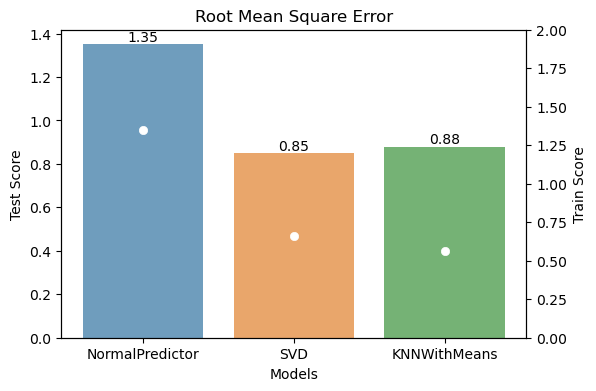

In [316]:
# plot rmse score of the training and testing data
fig, ax1 = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x = df_performance.index , y = "test_rmse", data = df_performance, ax = ax1, alpha = 0.7)
plt.xlabel("Models")
plt.ylabel("Test Score")
ax2 = ax1.twinx()
sns.scatterplot(x = df_performance.index , y = "train_rmse", data = df_performance, ax = ax2, color = "white")
ax2.set(ylim=(0, 2)) # increase the upper limit to 2 such that the training score is also visible on the graph
plt.ylabel("Train Score")
plt.title("Root Mean Square Error")


# This is adopted from: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots 
for container in ax.containers:
    ax.bar_label(container)


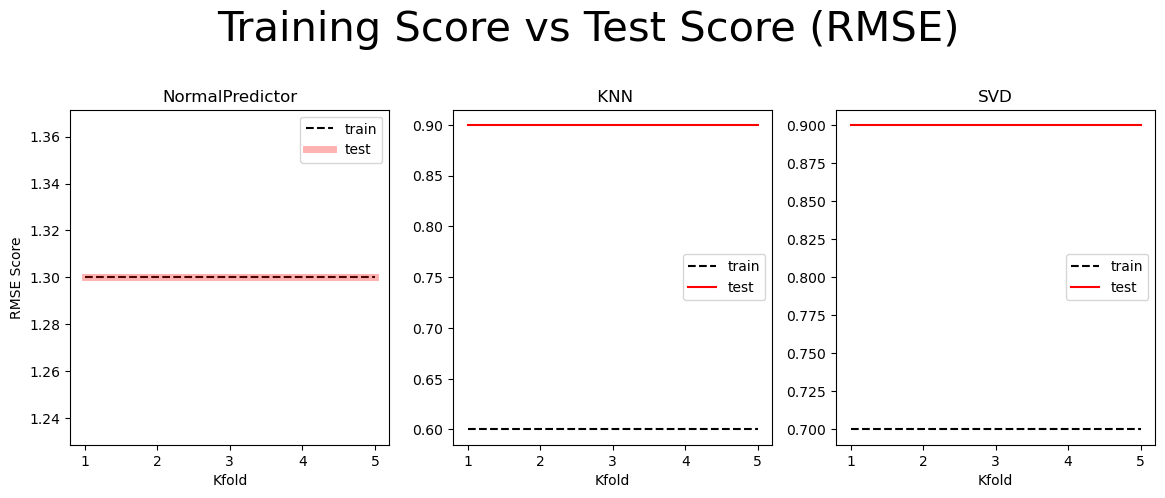

In [317]:
NormalPredictor =(pd.DataFrame(normal_predictior).reset_index().set_axis(range(1, len(pd.DataFrame(normal_predictior))+1)))
svd =(pd.DataFrame(svd).reset_index().set_axis(range(1, len(pd.DataFrame(svd))+1)))
knn =(pd.DataFrame(knn).reset_index().set_axis(range(1, len(pd.DataFrame(knn))+1)))

# Display the Kfold RMSE results of the cross validation

plt.figure(figsize  = (14, 5))

# RMSE score of the NormalPredictor mdoel
plt.subplot(131)
plt.plot(NormalPredictor.index,round(NormalPredictor["train_rmse"], 1),
         '--',label = "train", color = "black")
plt.plot(NormalPredictor.index,round(NormalPredictor["test_rmse"], 1),
         '-',label= 'test', alpha = 0.3, color = "red", linewidth = '5')
        
plt.xlabel("Kfold")
plt.ylabel("RMSE Score")
plt.title("NormalPredictor")
plt.legend()

# RMSE score of the KNN model 
plt.subplot(132)
plt.plot(knn.index,round(knn["train_rmse"], 1),'--',label = "train", color = "black")
plt.plot(knn.index,round(knn["test_rmse"], 1),'-',label= 'test' , color = "red")
plt.xlabel("Kfold")
plt.title(" KNN")
plt.legend()

# RMSE score of the SVD model
plt.subplot(133)
plt.plot(svd.index,round(svd["train_rmse"], 1), '--',label = "train", color = "black")
plt.plot(svd.index,round(svd["test_rmse"], 1), '-',label= 'test',  color = "red")
plt.xlabel("Kfold")
plt.title("SVD")
plt.legend()
plt.suptitle('Training Score vs Test Score (RMSE) ', fontsize=30)
plt.subplots_adjust(top=0.78)

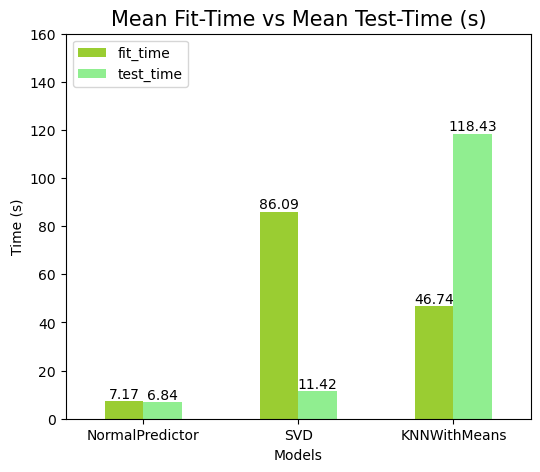

In [318]:
# Display the fit and test time
plt.rcParams["figure.figsize"] = (6,5)
ax = df_performance[['fit_time', 'test_time']].plot.bar(rot=0, color={"fit_time": "yellowgreen", "test_time": "lightgreen"})
ax.set_ylim([0,160]) # increase the y size to see better on the results of the SVD model
plt.title("Mean Fit-Time vs Mean Test-Time (s)", fontsize=15)
plt.xlabel("Models")
plt.ylabel("Time (s)")
plt.legend(loc='upper left')

# This is adopted from: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots 
for container in ax.containers:
    ax.bar_label(container)

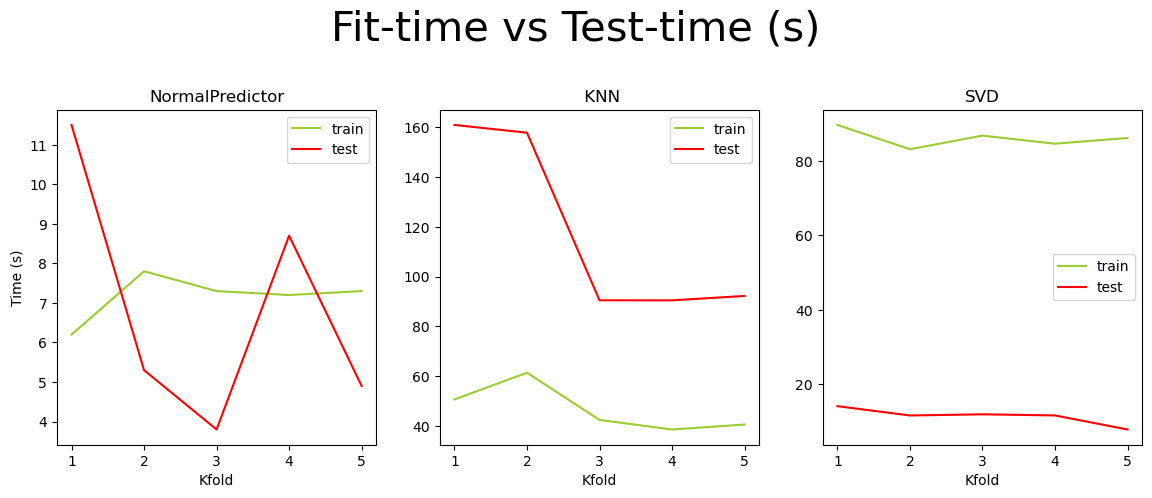

In [319]:
# Display the fit and test time of diffferent folds
plt.figure(figsize  = (14, 5))

# plot fit and test time of Normalpredictor model
plt.subplot(131)
plt.plot(NormalPredictor.index,round(NormalPredictor["fit_time"], 1)
         ,label = "train", color = "yellowgreen")
plt.plot(NormalPredictor.index, round(NormalPredictor["test_time"], 1),
         label= 'test', color = "red")
plt.xlabel("Kfold")
plt.ylabel("Time (s)")
plt.title("NormalPredictor")
plt.legend()

# plot fit and test time of KNN model 
plt.subplot(132)
plt.plot(knn.index, round(knn["fit_time"], 2), label = "train", color = "yellowgreen")
plt.plot(knn.index, round(knn["test_time"], 2), label= 'test',color = "red")
plt.xlabel("Kfold")
plt.title(" KNN")
plt.legend()


# plot fit and test time of SVD model
plt.subplot(133)
plt.plot(svd.index, round(svd["fit_time"], 2), label = "train",  color = "yellowgreen")
plt.plot(svd.index, round(svd["test_time"], 2), '-',label= 'test', color = "red")
plt.xlabel("Kfold")
plt.title("SVD")
plt.legend()
plt.suptitle('Fit-time vs Test-time (s) ', fontsize=30)
plt.subplots_adjust(top=0.78)

## $\color{red}{\text{ Discussion/Analysis Of The GridSearch Results}}$

After conducting GridSearch, the following set of hyperparameters were identified as the best for the KNNWithMeans model: 
- `k = 8`
- `name= MSD`

For the SVD model, the following set of hyperparameters were identified as the best:
- `n_epochs: 20`
- `lr_all = 0.005`


The NormalPredictor model shows balanced RMSE mean scores for both training and test datasets, indicating good generalisation without significant overfitting. However, the SVD and KNNWithMeans models consistently perform better on the training data than on test data, hinting at potential overfitting. The SVD model exhibits a training score of 0.66, whereas its RMSE test score is 0.85. The KNNWithMeans model displays a training score of 0.56, surpassing the test score of 0.88. Several factors may contribute to this overfitting. The selection used to select movies focused solely on movies with ratings higher than the average of all movies. Therefore, other outliers such as highly/lowly rating users were not specifically excluded and might be a reason for the overfitting (SVD and KNN models can be severely affected by outliers). The skewness and the kurtosis analysis of the filtered dataset have also shown that the filtered dataset contains potentially more outliers than the original one, impacting negatively model performance. Also due to the memory issue only the two most important hyperparameters were tuned for each model. Both KNNWithMeans and SVD models are known to be sensitive to hyperparameter choices, which could also cause overfitting. 

Despite overfitting, both SVD and KNNWithMeans models outperform the NormalPredictor.This was anticipated because the NormalPredictor model is a basic model that only assumes that the ratings are normally distributed and based on this assumption it predicts random ratings. In contrast, both  SVD and KNNWithMeans models employ sophisticated algorithms with several hyperparameters, allowing them to capture the underlying patterns of data better, which leads to better predictive performance. It is worth noting that the test performance of the SVD model is nearly as good as KNNWithMeans (the SVD score is 0.03 lower than KNNWithMeans).  

Considering fit times, SVD stands out as the slowest, taking almost 14 times longer than the NormalPredictor. This is expected, since Matrix factorization-based models, like SVD tend to be computationally expensive, especially with a large number of movies and users. KNNWithMeans also has a longer fit time compared to NormalPredictor, which was anticipated. KNN-based models struggle with sparse data and require more time as the dataset size increases due to nearest-neighbour computations.

Across different folds, KNN's training fit time decreases after Kfold 1 and stabilizes. SVD's training fit time remains stable, but interestingly, its test fit time decreases. Notably, SVD's training time is higher than its test time, while for KNNWithMeans, it's the opposite.

To improve the recommendation system's performance one could explore the application of Deep Learning models such as autoencoders, which excel at capturing complex nonlinear user-item relationships. Additionally, to use more observations and to fine-tune more hyperparameters other packages than the surprise package can be considered. The surprise package has the limitation that it does not allow the advantage of parallel programming. One can also consider using a tiny dataset to do more comprehensive hyperparameters (tuning more than 2 parameters) and use the result to train a model with a large dataset.


# $\color{orange}{\text{Part 4: Models without Gridsearch}}$

The parameters derived from the GridSearch models were evaluated by splitting the filtered dataset into training and testing sets. In terms of RMSE, the NormalPredictor has an error score of 1.35, while the KNNWithMeans and SVD models achieved 0.85 and 0.8, respectively. It's noteworthy that all three models yielded RMSE scores higher than the mean score achieved during model tuning.

When examining the actual rating scores and their corresponding predictions, some patterns are visible. The most frequent actual rating is 4, but NormalPredictor predicts 3.5 as the most common, while KNN and SVD predict 4. Interestingly, all three models struggle to predict ratings in the less common range of 0.5 to 2.5. The histogram reveals that that SVD and KNN models exhibit samller errors compared to the NormalPredictor.

In [ ]:
# prepare the dataset for training
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_filtered[["movieId", "userId", "rating"]], reader)
trainset, testset = train_test_split(data, test_size=0.4)

## $ \color{red}{\text{NormalPredictor}}$

In [17]:
start= datetime.now()

model = NormalPredictor()
model.fit(trainset)
predictions = model.test(testset)
# Convert the predictions into df and save it
pd.DataFrame(predictions).to_csv("predictions_NormalP.csv")

end= datetime.now()
print(end - start)

print(accuracy.rmse(predictions))

0:06:17.641145
RMSE: 1.3474
1.3473515951647217


In [320]:
# load df predictions
df_pred_NP= pd.read_csv("predictions_NormalP.csv", index_col=  0)
df_pred_NP.rename(columns = {"uid": "userId", "iid": "movieId", "r_ui": "actual_ratings",
                              "est": "predicted_ratings"}, inplace= True)
df_pred_NP.drop("details", axis = 1, inplace = True)

# Calculate the error (difference between actual ratings and the predicted ratings)
df_pred_NP["error"] = np.abs(df_pred_NP["actual_ratings"] - df_pred_NP["predicted_ratings"])
df_pred_NP.head()

,userId,movieId,actual_ratings,predicted_ratings,error
0,750,81906,4.5,3.039323,1.460677
1,1198,282440,5.0,4.708399,0.291601
2,81562,231518,1.0,2.323036,1.323036
3,26840,254870,4.0,2.055396,1.944604
4,2046,105994,1.0,4.244569,3.244569


## $ \color{red}{\text{SVD}}$

In [18]:
start= datetime.now()
model = SVD(n_epochs = 20, lr_all = 0.005)
model.fit(trainset)
predictions = model.test(testset)

# Convert the predictions into df and save it
pd.DataFrame(predictions).to_csv("predictions_svd.csv")

end= datetime.now()
print(end - start)
(accuracy.rmse(predictions))

0:08:47.275069
RMSE: 0.7969


0.7968986922230937

In [321]:
# load df predictions
df_pred_svd = pd.read_csv("predictions_svd.csv", index_col=  0)
df_pred_svd.rename(columns = {"uid": "userId", "iid": "movieId", "r_ui": "actual_ratings",
                              "est": "predicted_ratings"}, inplace= True)
df_pred_svd.drop("details", axis = 1, inplace = True)

# Calculate the error (difference between actual ratings and the predicted ratings)
df_pred_svd["error"] = np.abs(df_pred_svd["actual_ratings"] - df_pred_svd["predicted_ratings"])
df_pred_svd.head()


,userId,movieId,actual_ratings,predicted_ratings,error
0,750,81906,4.5,4.021018,0.478982
1,1198,282440,5.0,3.965411,1.034589
2,81562,231518,1.0,3.820966,2.820966
3,26840,254870,4.0,3.957419,0.042581
4,2046,105994,1.0,2.560742,1.560742


## $ \color{red}{\text{KNNWithMeans}}$

In [16]:
start= datetime.now()
model = KNNWithMeans(k = 8, name = "MSD")
model.fit(trainset)
predictions = model.test(testset)

# Convert the predictions into df and save it
pd.DataFrame(predictions).to_csv("predictions_knn.csv")


end= datetime.now()
print(end - start)
(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
0:33:52.265479
RMSE: 0.8481


0.8480908219307481

In [322]:
# load df predictions
df_pred_knn = pd.read_csv("predictions_knn.csv", index_col=  0)
df_pred_knn.rename(columns = {"uid": "userId", "iid": "movieId", "r_ui": "actual_ratings",
                              "est": "predicted_ratings"}, inplace= True)
df_pred_knn.drop("details", axis = 1, inplace = True)
# Calculate the error (difference between actual ratings and the predicted ratings)
df_pred_knn["error"] = np.abs(df_pred_knn["actual_ratings"] - df_pred_knn["predicted_ratings"])
df_pred_knn.head()

,userId,movieId,actual_ratings,predicted_ratings,error
0,750,81906,4.5,4.306529,0.193471
1,1198,282440,5.0,3.138557,1.861443
2,81562,231518,1.0,4.031289,3.031289
3,26840,254870,4.0,3.533914,0.466086
4,2046,105994,1.0,3.254794,2.254794


In [323]:
# df.col1.mul(2).round().div(2): is adopted from https://stackoverflow.com/questions/49164853/rounding-python-values-to-the-nearest-half-number

def ratings_visualisations(df,variable, optional, title): 
    plt.subplot(optional)
    palette = sns.color_palette("tab10", 10)
    # Round the predicted ratings to the nearest half number
    a = pd.DataFrame(df[variable].mul(2).round().div(2))
    count_rating = (a[variable].value_counts(sort=False)/ 1000)
    ax =count_rating.plot(kind= "bar", title = title, xlabel = "Rating Score", ylabel = "Count ( x 1000)",
                          color = palette)
    for container in ax.containers:
        ax.bar_label(container)


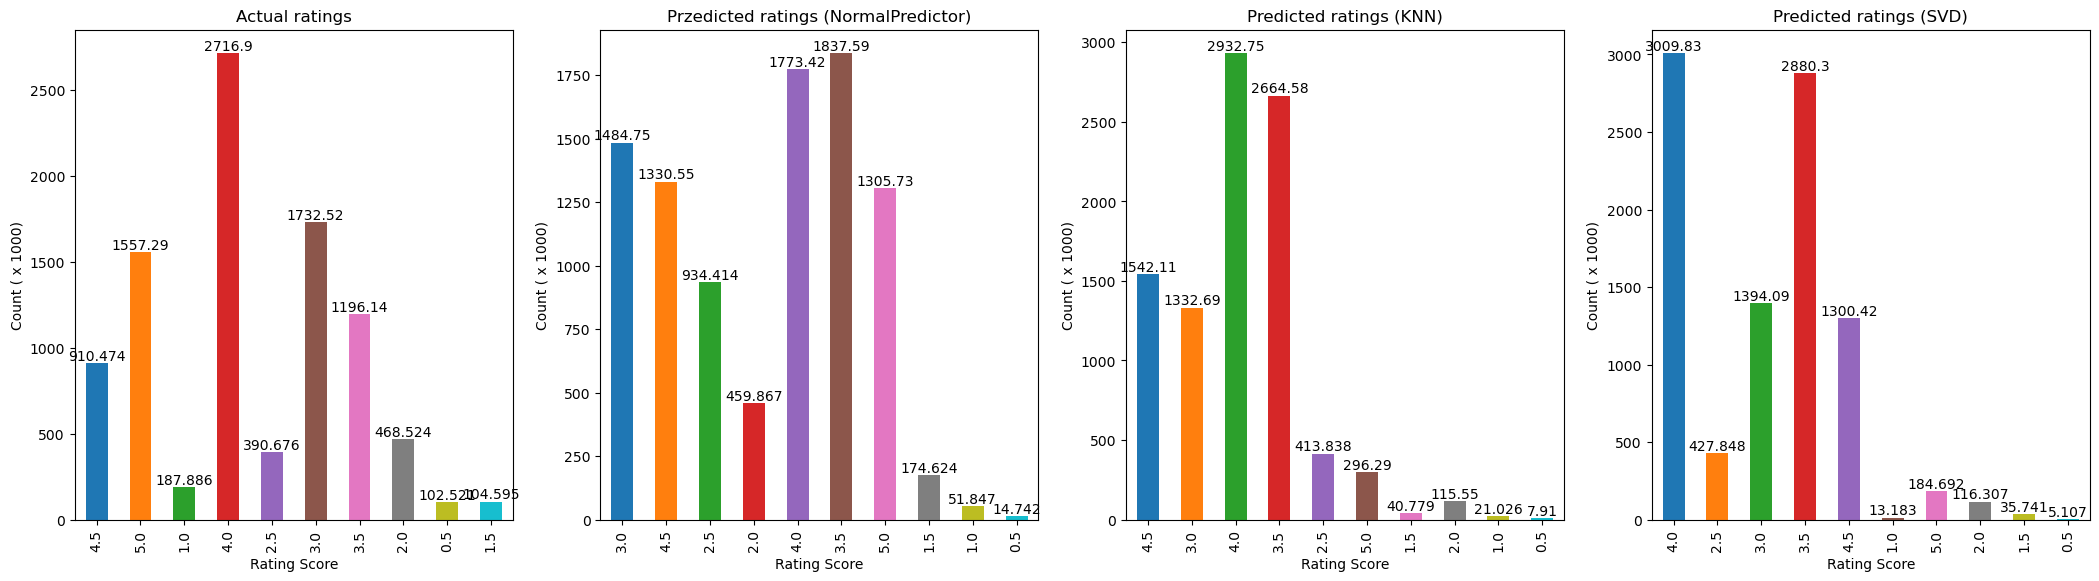

In [324]:
# Actual ratings distribution vs predictions distributions
plt.rcParams["figure.figsize"] = (26, 14)
ratings_visualisations(df_pred_NP, "actual_ratings",  241, "Actual ratings")
ratings_visualisations(df_pred_NP, "predicted_ratings",  242, "Przedicted ratings (NormalPredictor)")
ratings_visualisations(df_pred_knn, "predicted_ratings",  243, "Predicted ratings (KNN)")
ratings_visualisations(df_pred_svd, "predicted_ratings",  244, "Predicted ratings (SVD)")

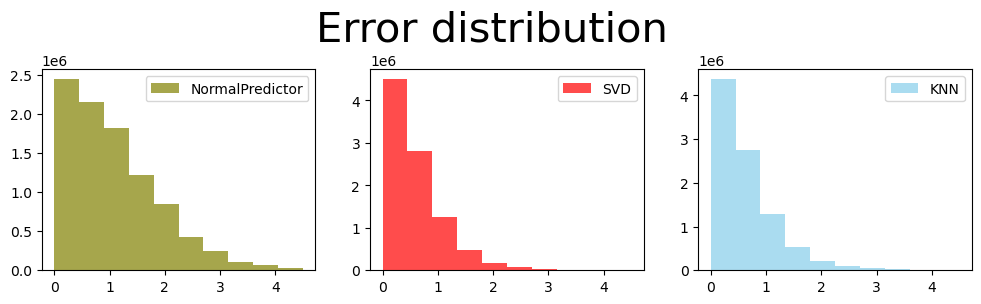

In [325]:
# Distribtuion of the error
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.hist(df_pred_NP["error"], alpha = 0.7, label = "NormalPredictor", color = "olive")
plt.legend()

plt.subplot(132)
plt.hist(df_pred_svd["error"], alpha = 0.7, label = "SVD", color = "red")
plt.legend()

plt.subplot(133)
plt.hist(df_pred_knn["error"], alpha = 0.7, label = "KNN", color = "skyblue")
plt.suptitle('Error distribution', fontsize=30)
plt.subplots_adjust(top=0.78)
plt.legend()

# Reference

    
[1]): Bokde, D., Girase, S., & Mukhopadhyay, D. (2015). Title of the webpage. ScienceDirect. https://www.sciencedirect.com/science/article/pii/S1877050915007462

[2]) : Amatriain, X., Jaimes*, A., Oliver, N., Pujol, J.M. (2011). Data Mining Methods for Recommender Systems. In: Ricci, F., Rokach, L., Shapira, B., Kantor, P. (eds) Recommender Systems Handbook. Springer, Boston, MA. https://doi.org/10.1007/978-0-387-85820-3_2


[3]): https://surprise.readthedocs.io/en/stable/index.html

